IMPORTING LIBRARIES

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOADING DATA

In [59]:
student_performance=pd.read_csv(r"C:\Users\jayat\OneDrive\Documents\student\student-mat.csv",sep=';')

RANDOM 5 VALUES

In [60]:
student_performance.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
133,GP,F,16,U,GT3,A,3,4,services,other,...,3,2,1,1,4,5,16,12,11,11
353,MS,M,19,R,GT3,T,1,1,other,other,...,4,4,4,3,3,5,4,8,8,8
339,GP,F,17,R,GT3,A,3,2,other,other,...,4,3,3,2,3,2,4,9,10,10
84,GP,F,15,U,GT3,T,1,1,other,other,...,4,3,2,2,3,4,2,9,10,10
174,GP,F,16,U,LE3,T,3,3,other,other,...,4,4,5,1,1,4,4,10,11,9


SHAPE

In [61]:
print('DATASET SHAPE:',student_performance.shape)

DATASET SHAPE: (395, 33)


CHECKING FOR MISSING VALUES

In [62]:
student_performance.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

CHECKING FOR DATA TYPE

In [63]:
student_performance.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

RENAMING COLUMNS

In [64]:
rename_cols = {
    'school': 'school_name',
    'sex': 'gender',
    'age': 'age',
    'address': 'urban_or_rural',
    'famsize': 'family_size',
    'Pstatus': 'parents_together',
    'Medu': 'mother_education',
    'Fedu': 'father_education',
    'Mjob': 'mother_job',
    'Fjob': 'father_job',
    'reason': 'school_choice_reason',
    'guardian': 'guardian_name',
    'traveltime': 'school_travel_time',
    'studytime': 'weekly_study_time',
    'failures': 'past_class_failures',
    'schoolsup': 'school_support',
    'famsup': 'family_support',
    'paid': 'paid_classes',
    'activities': 'extra_activities',
    'nursery': 'attended_nursery',
    'higher': 'wants_higher_ed',
    'internet': 'internet_access',
    'romantic': 'in_relationship',
    'famrel': 'family_relationship',
    'freetime': 'free_time',
    'goout': 'social_outings',
    'Dalc': 'weekday_alcohol',
    'Walc': 'weekend_alcohol',
    'health': 'health_status',
    'absences': 'total_absences',
    'G1': 'grade_period1',
    'G2': 'grade_period2',
    'G3': 'final_grade'
}
student_performance.rename(columns=rename_cols, inplace=True)


In [65]:
student_performance.columns

Index(['school_name', 'gender', 'age', 'urban_or_rural', 'family_size',
       'parents_together', 'mother_education', 'father_education',
       'mother_job', 'father_job', 'school_choice_reason', 'guardian_name',
       'school_travel_time', 'weekly_study_time', 'past_class_failures',
       'school_support', 'family_support', 'paid_classes', 'extra_activities',
       'attended_nursery', 'wants_higher_ed', 'internet_access',
       'in_relationship', 'family_relationship', 'free_time', 'social_outings',
       'weekday_alcohol', 'weekend_alcohol', 'health_status', 'total_absences',
       'grade_period1', 'grade_period2', 'final_grade'],
      dtype='object')

CHANGING DATATYPES

In [66]:
categorical_col = [
    'school_name', 'gender', 'urban_or_rural', 'family_size', 'parents_together',
    'mother_job', 'father_job', 'school_choice_reason', 'guardian_name',
    'school_support', 'family_support', 'paid_classes', 'extra_activities',
    'attended_nursery', 'wants_higher_ed', 'internet_access', 'in_relationship'
]
for col in categorical_col:
    student_performance[col] = student_performance[col].astype('category')

DATASET SUMMARY

In [67]:
print("DATASET SUMMARY:\n",student_performance.describe)

DATASET SUMMARY:
 <bound method NDFrame.describe of     school_name gender  age urban_or_rural family_size parents_together  \
0            GP      F   18              U         GT3                A   
1            GP      F   17              U         GT3                T   
2            GP      F   15              U         LE3                T   
3            GP      F   15              U         GT3                T   
4            GP      F   16              U         GT3                T   
..          ...    ...  ...            ...         ...              ...   
390          MS      M   20              U         LE3                A   
391          MS      M   17              U         LE3                T   
392          MS      M   21              R         GT3                T   
393          MS      M   18              R         LE3                T   
394          MS      M   19              U         LE3                T   

     mother_education  father_education mother_

VISUALIZING GRAPHS

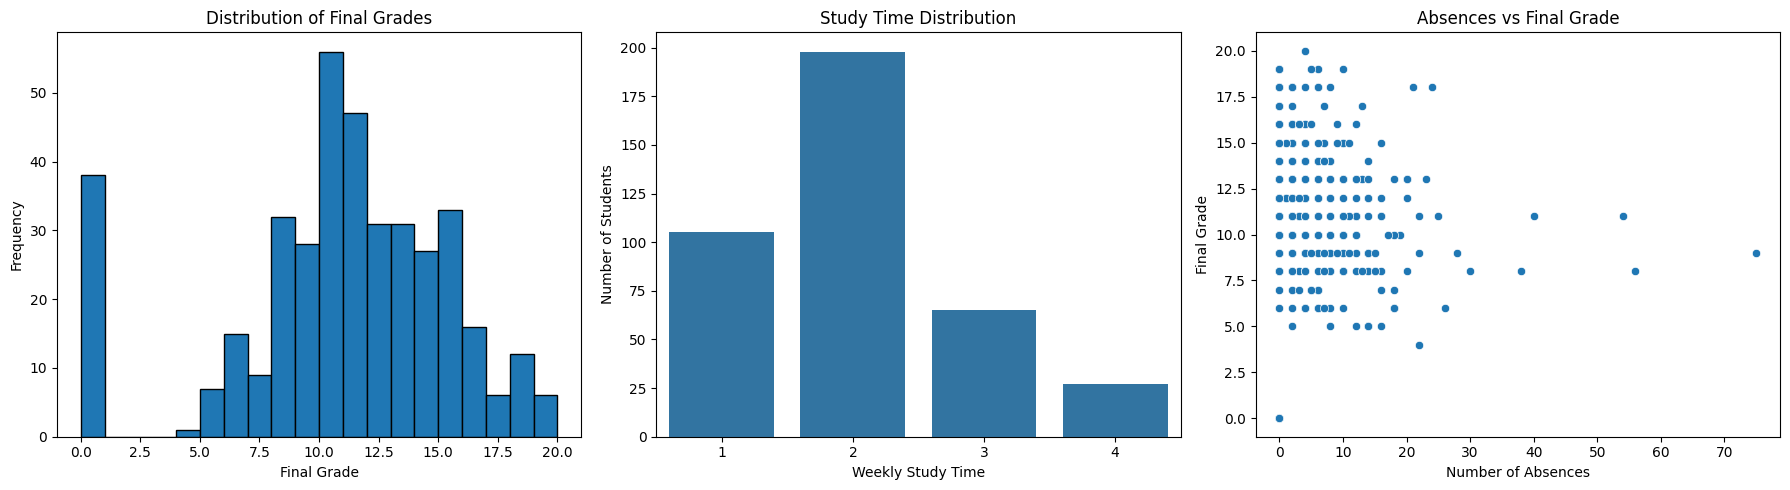

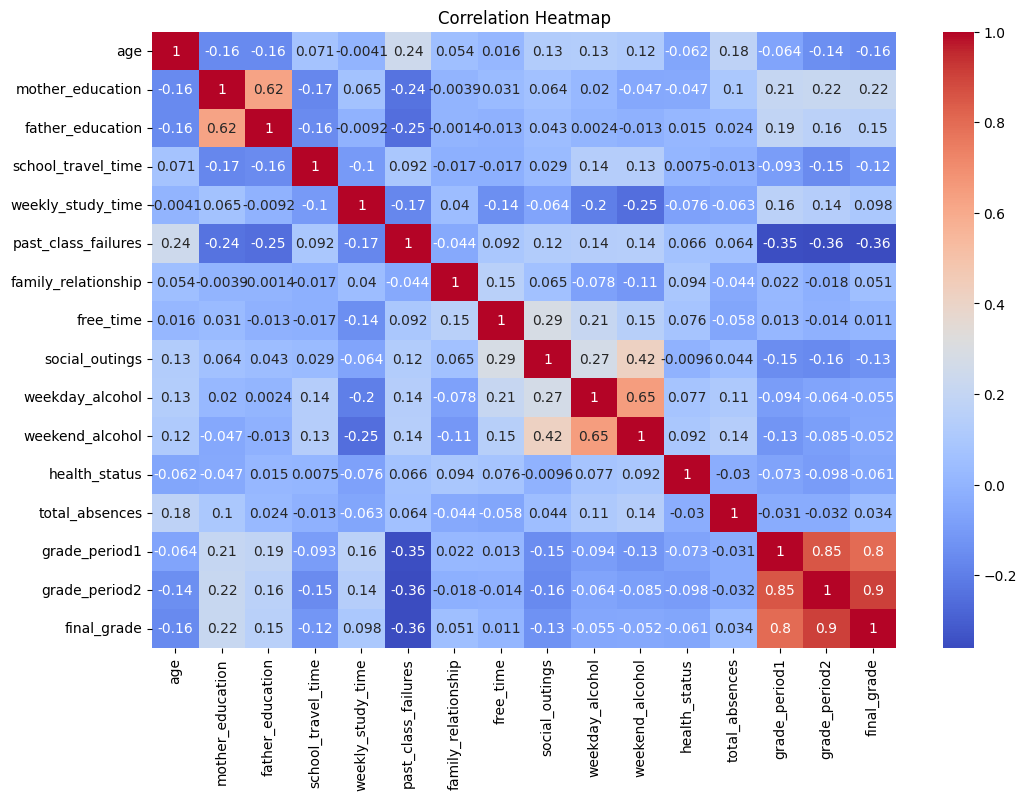

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Final Grades
student_performance['final_grade'].plot(kind='hist', bins=20, edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Final Grades')
axes[0].set_xlabel('Final Grade')
axes[0].set_ylabel('Frequency')

# Plot 2: Study Time Distribution
sns.countplot(x='weekly_study_time', data=student_performance, ax=axes[1])
axes[1].set_title('Study Time Distribution')
axes[1].set_xlabel('Weekly Study Time')
axes[1].set_ylabel('Number of Students')

# Plot 3: Absences vs Final Grade
sns.scatterplot(x='total_absences', y='final_grade', data=student_performance, ax=axes[2])
axes[2].set_title('Absences vs Final Grade')
axes[2].set_xlabel('Number of Absences')
axes[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()



plt.figure(figsize=(12,8))
sns.heatmap(student_performance.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

FEATURE ENGINEERING

BINARY ENCODING

In [71]:
binary_cols = ['school_support', 'family_support', 'paid_classes', 'extra_activities', 'attended_nursery', 'wants_higher_ed', 'internet_access', 'in_relationship']
for col in binary_cols:
    student_performance[col] = student_performance[col].map({'yes':1, 'no':0})

LABEL ENCODING

In [72]:
student_performance['gender'] = student_performance['gender'].map({'F':0, 'M':1})
student_performance['urban_or_rural'] = student_performance['urban_or_rural'].map({'U':1, 'R':0})
student_performance['parents_together'] = student_performance['parents_together'].map({'T':1, 'A':0})
student_performance['family_size'] = student_performance['family_size'].map({'GT3':1, 'LE3':0})

COLUMN CREATION

In [73]:
student_performance['grade_avg'] = (student_performance['grade_period1'] + student_performance['grade_period2']) / 2

FEATURE SCALING

In [74]:
features = ['weekly_study_time', 'total_absences', 'grade_period1', 'grade_period2', 'grade_avg']
features += ['school_support', 'family_support', 'paid_classes', 'extra_activities', 'attended_nursery', 'wants_higher_ed', 'internet_access', 'in_relationship']
features += ['gender', 'urban_or_rural', 'parents_together', 'family_size']
target = 'final_grade'

DATA SPLITTING

In [75]:
X = student_performance[features]
y = student_performance[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODEL TRAINING AND EVALUATION

In [79]:
X = student_performance[features]
y = student_performance[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 10: Model Training & Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'R2 (%)': round(r2_score(y_test, y_pred) * 100, 2)
    }


DISPLAY RESULTS

Model Performance Comparison:
                        MAE      RMSE        R2  R2 (%)
Lasso Regression   1.303478  2.061184  0.792808   79.28
Random Forest      1.214684  2.077560  0.789503   78.95
Ridge Regression   1.471544  2.201492  0.763640   76.36
Linear Regression  1.476180  2.205599  0.762758   76.28


C:\Users\jayat\AppData\Local\Temp\ipykernel_12672\686703828.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.reset_index(), x='index', y='R2 (%)', palette='Blues_d')


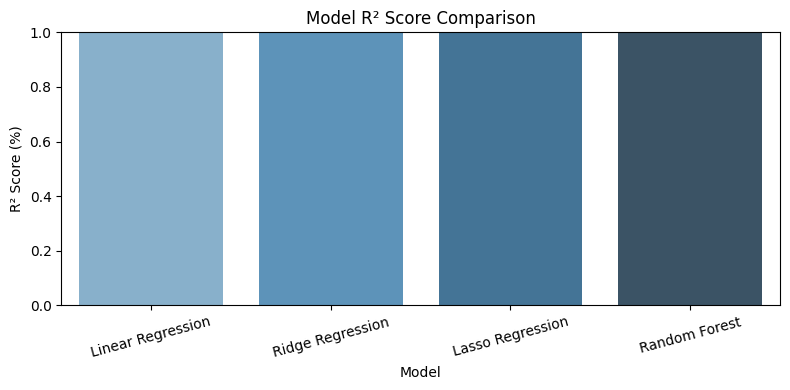

In [80]:
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))

# Visualize Model Performance (Bar Plot)
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df.reset_index(), x='index', y='R2 (%)', palette='Blues_d')
plt.title('Model R² Score Comparison')
plt.xlabel('Model')
plt.ylabel('R² Score (%)')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [81]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

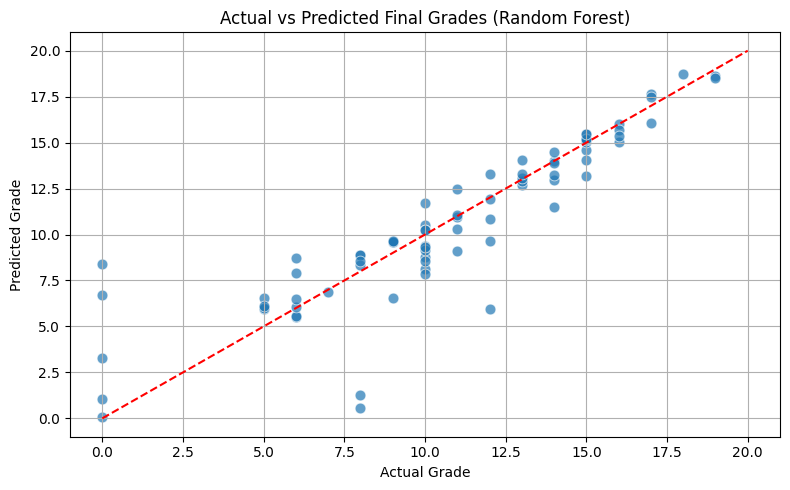

Top 10 Predictions (Actual vs Predicted):
   Actual  Predicted  error
0      10       8.76   1.24
1      12      11.95   0.05
2       5       6.54   1.54
3      10       9.36   0.64
4       9       9.66   0.66
5      13      12.72   0.28
6      18      18.72   0.72
7       6       7.88   1.88
8       0       6.70   6.70
9      14      12.98   1.02
Worst 10 Predictions (by absolute error):
    Actual  Predicted  error
24       0       8.40   8.40
34       8       0.57   7.43
16       8       1.25   6.75
8        0       6.70   6.70
27      12       5.95   6.05
19       0       3.26   3.26
70       6       8.72   2.72
38      14      11.49   2.51
64       9       6.57   2.43
52      12       9.64   2.36

Model Performance Comparison:
                        MAE      RMSE        R2
Lasso Regression   1.303478  2.061184  0.792808
Random Forest      1.214684  2.077560  0.789503
Ridge Regression   1.471544  2.201492  0.763640
Linear Regression  1.476180  2.205599  0.762758


In [82]:
# Compare Actual vs Predicted (Random Forest)
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)
pred_comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Actual', y='Predicted', data=pred_comparison_df, alpha=0.7, s=60)
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.title('Actual vs Predicted Final Grades (Random Forest)')
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show top and worst predictions
pred_comparison_df['error'] = abs(pred_comparison_df['Actual'] - pred_comparison_df['Predicted'])
print("Top 10 Predictions (Actual vs Predicted):")
print(pred_comparison_df.head(10))

print("Worst 10 Predictions (by absolute error):")
print(pred_comparison_df.sort_values(by='error', ascending=False).head(10))

# Compare Actual vs Predicted (Random Forest)
y_pred_rf = rf_model.predict(X_test)
pred_comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_rf
})


results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df.sort_values(by='R2', ascending=False))

In [ ]:
FEATURE IMPORTANCE

In [39]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

MODEL COMAPRISION

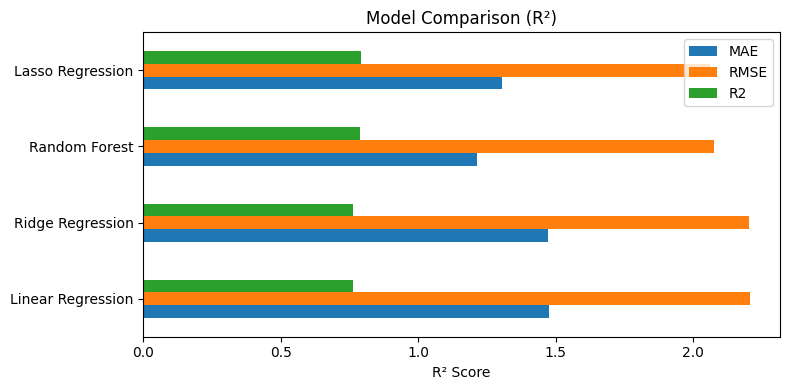

In [42]:
results_df.sort_values(by='R2').plot(kind='barh', figsize=(8, 4), title='Model Comparison (R²)')
plt.xlabel('R² Score')
plt.tight_layout()
plt.show()

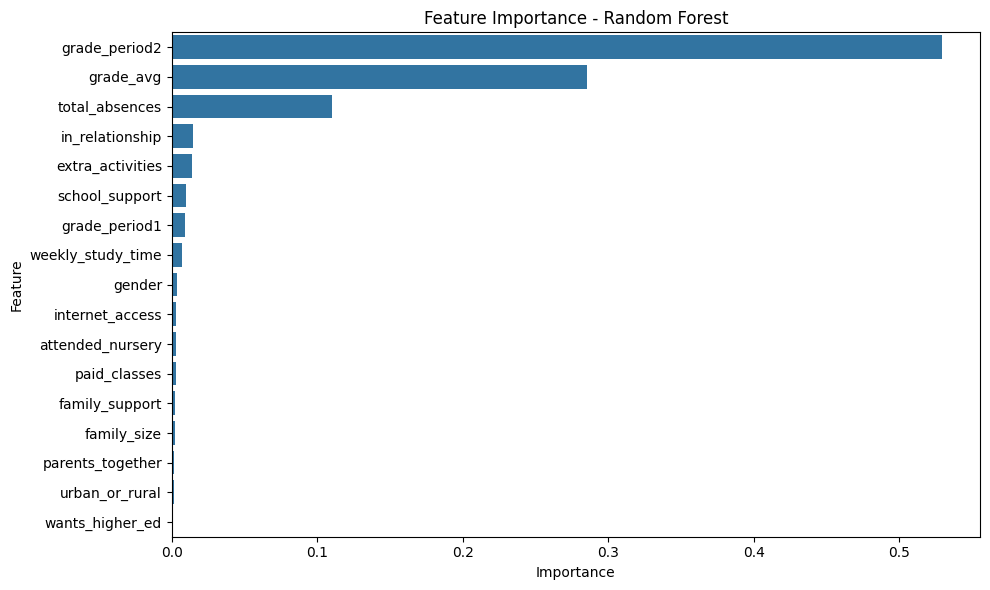

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()
